# Contradictory, My Dear Watson

The Natural Language Inference (NLI) project on Kaggle involves building a machine learning model that can accurately classify pairs of sentences (premise and hypothesis) into three categories: entailment, contradiction, or neutral. The dataset provided for this task contains thousands of such pairs in fifteen different languages.

## Downloading the Dataset using Kaggle API

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

In [ ]:
import json 

# Get this API token from Kaggle account
# Replace the username and key with yours
api_token = {"username":your-user-name,"key":your-key}

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

In [ ]:
!chmod 600 ../.kaggle/kaggle.json
!kaggle competitions download -c contradictory-my-dear-watson

chmod: cannot access '../.kaggle/kaggle.json': No such file or directory
 56% 1.00M/1.78M [00:00<00:00, 1.48MB/s]
100% 1.78M/1.78M [00:00<00:00, 2.32MB/s]


In [ ]:
!unzip contradictory-my-dear-watson.zip

Archive:  contradictory-my-dear-watson.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


## Loading the Dataset

In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 16.3 MB/s eta 0:00:00


In [5]:
import pandas as pd 

# Reading the dataset using Pandas
train_data = pd.read_csv('train.csv')
train_data.head()

,id,premise,hypothesis,lang_abv,language,label
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2
2,3931fbe82a,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,0
3,5622f0c60b,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,0
4,86aaa48b45,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,Thai,1


Dataset consist of 6 columns where each column is identified by:

**id**: A unique identifier for each premise-hypothesis pair.

**premise**: The first sentence in the pair, also known as the premise.

**hypothesis**: The second sentence in the pair, also known as the hypothesis.

**lang_abv**: A 2-letter abbreviation for the language of the premise and hypothesis (e.g., "en" for English, "fr" for French).

**language**: The name of the language corresponding to the lang_abv code (e.g., "English", "French").

**label**: The label indicating the relationship between the premise and hypothesis. There are three possible labels: "entailment" (if the hypothesis logically follows from the premise), "contradiction" (if the hypothesis is logically incompatible with the premise), and "neutral" (if the relationship between the premise and hypothesis is neither entailing nor contradictory). The label is encoded as an integer: 0 for **entailment**, 1 for **neutral**, and 2 for **contradiction**.

## Loading MNLI Dataset

Loading MNLI dataset to get more data to improve our performance in training and to get accurate results. The MNLI (Multi-Genre Natural Language Inference) dataset is a benchmark dataset for natural language inference (NLI) tasks. NLI involves determining the logical relationship between a pair of sentences: whether the relationship is "entailment" (the second sentence can be inferred from the first), "contradiction" (the second sentence contradicts the first), or "neutral" (there is no logical relationship between the two sentences). The MLNI dataset is designed to be diverse and representative of different genres and writing styles. It consists of sentence pairs from various sources, including news articles, Wikipedia, and fiction. The dataset is manually annotated with the correct labels for entailment, contradiction, or neutral.

In [ ]:
from datasets import load_dataset

# Function to load the MLNI dataset
def load_mnli(use_validation=True):
    result=[]
    dataset=load_dataset('multi_nli')
    print(dataset)
    for record in dataset['train']:
        c1, c2, c3 = record['premise'],record['hypothesis'], record['label']
        if c1 and c2 and c3 in {0, 1, 2}:
            result.append((c1, c2, c3, 'en'))
    result=pd.DataFrame(result, columns=['premise', 'hypothesis', 'label', 'lang_abv'])
    return result

In [ ]:
mnli_df = load_mnli()
mnli_df.head()

Generating train split:   0%|          | 0/392702 [00:00<?, ? examples/s]

Generating validation_matched split:   0%|          | 0/9815 [00:00<?, ? examples/s]

Generating validation_mismatched split:   0%|          | 0/9832 [00:00<?, ? examples/s]

Dataset multi_nli downloaded and prepared to /root/.cache/huggingface/datasets/multi_nli/default/0.0.0/591f72eb6263d1ab527561777936b199b714cda156d35716881158a2bd144f39. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['promptID', 'pairID', 'premise', 'premise_binary_parse', 'premise_parse', 'hypothesis', 'hypothesis_binary_parse', 'hypothesis_parse', 'genre', 'label'],
        num_rows: 392702
    })
    validation_matched: Dataset({
        features: ['promptID', 'pairID', 'premise', 'premise_binary_parse', 'premise_parse', 'hypothesis', 'hypothesis_binary_parse', 'hypothesis_parse', 'genre', 'label'],
        num_rows: 9815
    })
    validation_mismatched: Dataset({
        features: ['promptID', 'pairID', 'premise', 'premise_binary_parse', 'premise_parse', 'hypothesis', 'hypothesis_binary_parse', 'hypothesis_parse', 'genre', 'label'],
        num_rows: 9832
    })
})


,premise,hypothesis,label,lang_abv
0,Conceptually cream skimming has two basic dime...,Product and geography are what make cream skim...,1,en
1,you know during the season and i guess at at y...,You lose the things to the following level if ...,0,en
2,One of our number will carry out your instruct...,A member of my team will execute your orders w...,0,en
3,How do you know? All this is their information...,This information belongs to them.,0,en
4,yeah i tell you what though if you go price so...,The tennis shoes have a range of prices.,1,en


In [ ]:
# Saving the mnli dataset to csv file
mnli_df.to_csv('mnli.csv', index=False)

In [6]:
mnli_df = pd.read_csv('content/mnli.csv')
mnli_df.head()

,premise,hypothesis,label,lang_abv
0,Conceptually cream skimming has two basic dime...,Product and geography are what make cream skim...,1,en
1,you know during the season and i guess at at y...,You lose the things to the following level if ...,0,en
2,One of our number will carry out your instruct...,A member of my team will execute your orders w...,0,en
3,How do you know? All this is their information...,This information belongs to them.,0,en
4,yeah i tell you what though if you go price so...,The tennis shoes have a range of prices.,1,en


In [6]:
from sklearn.model_selection import train_test_split

# Splting the dataset into train and validation sets
train_df, val_df = train_test_split(train_data, test_size=0.2, random_state=42)
print('The size of Training data: {}'.format(train_df.shape))
print('The size of Validation data: {}'.format(val_df.shape))

The size of Training data: (9696, 6)
The size of Validation data: (2424, 6)


In [8]:
# Concatenating the datasets
train_data = pd.concat([train_df, mnli_df.loc[:100000]], ignore_index=True)

## Exploratory Data Analysis

Exploratory Data Analysis (EDA) is an important step in any data science project, including Natural Language Processing (NLP) tasks like Natural Language Inference (NLI). 
First, we can start by examining the distribution of the target labels (entailment, neutral, and contradiction) in the training set. This can give us an idea of whether the dataset is balanced or imbalanced, which can affect our modeling choices. We can use a simple bar chart to visualize the label distribution

In [ ]:
train_data.describe()

,label
count,109697.000000
mean,1.011641
std,0.829717
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109697 entries, 0 to 109696
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          9696 non-null    object
 1   premise     109697 non-null  object
 2   hypothesis  109682 non-null  object
 3   lang_abv    109697 non-null  object
 4   language    9696 non-null    object
 5   label       109697 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 5.0+ MB


In [ ]:
import matplotlib.pyplot as plt

def plot_label_distribution(df, label_col):
    # Compute the frequency of each label in the dataset
    label_freq = df[label_col].value_counts()

    # Create a bar chart of the label distribution
    plt.bar(label_freq.index, label_freq.values)

    # Set the chart title and axis labels
    plt.title('Label Distribution')
    plt.xlabel('Label')
    plt.ylabel('Frequency')

    # Show the plot
    plt.show()

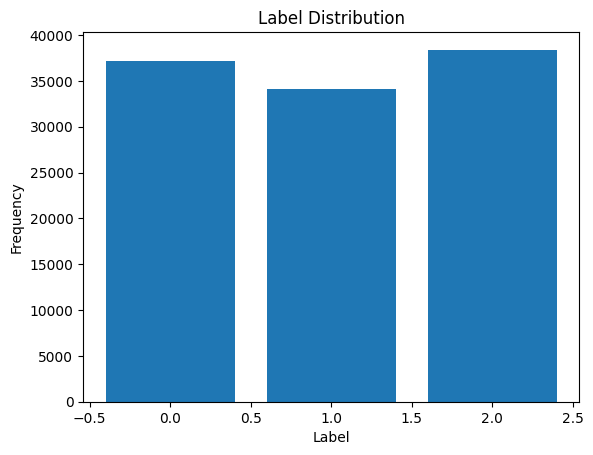

In [ ]:
# Plots the distribution of the labels in a dataset.
plot_label_distribution(train_data, 'label')

From this chart, we can see that the dataset is fairly balanced, with roughly equal numbers of examples for each label.

In [ ]:
def plot_sentence_length(dataframe, column):
    # Get length of each sentence in the column
    sentence_lengths = dataframe[column].apply(lambda x: len(str(x).split()) if isinstance(x, str) else 0)
    
    # Plot histogram of sentence lengths
    plt.hist(sentence_lengths, bins=20)
    plt.xlabel('Sentence Length')
    plt.ylabel('Count')
    plt.title(f'Distribution of Sentence Lengths in "{column}" Column')
    plt.show()

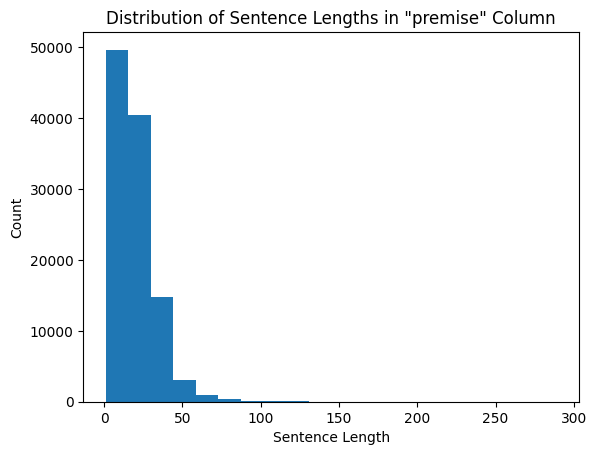

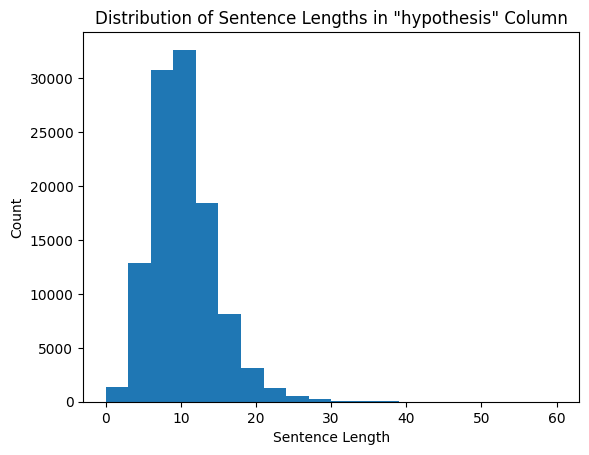

In [ ]:
# Plots the length of sentences in given column
plot_sentence_length(train_data, 'premise')
plot_sentence_length(train_data, 'hypothesis')

From these charts, we can see that the lengths of the premises and hypotheses are roughly normally distributed, with most examples falling within a certain range of lengths. This information can be useful for choosing appropriate sequence lengths and hyperparameters for our models.

In [ ]:
def plot_language_distribution(df):
    # Plots a pie chart of the language distribution in a DataFrame.
    language_counts = df['language'].value_counts()
    plt.figure(figsize=(8, 6))
    plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('Language Distribution')
    plt.show()

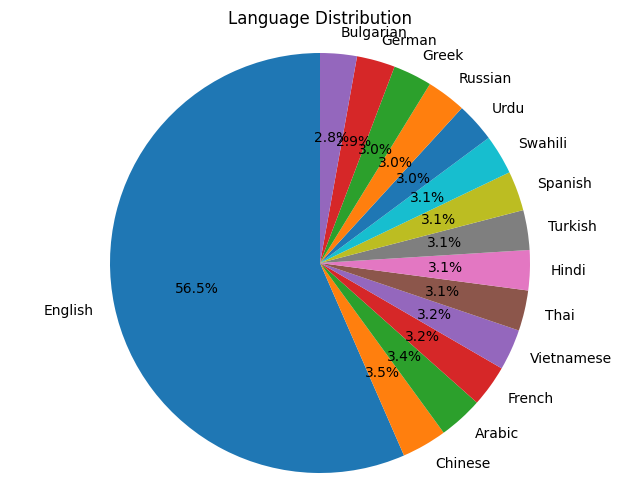

In [ ]:
# Plots a pie chart of the language distribution in a DataFrame
plot_language_distribution(train_df)

From the pie chart of language distribution, we can interpret that the majority of the dataset is in English, followed by German and French. The other languages have a much smaller representation in the dataset. This information is useful when building models, as we may need to consider language-specific features or pre-trained language models for certain languages with less data. Additionally, if we are interested in building models that perform well across multiple languages, we may need to ensure that the model is trained on a balanced representation of each language to avoid language bias

## Training 

Training the XLM-RoBERTa model involves initializing the XLM-RoBERTa model with the appropriate configuration and weights. Defining the optimizer, loss function, and evaluation metric for the model. Training the model using the training dataset, and validating it using the validation dataset. Evaluating the trained model on the test dataset. Saving the trained model and tokenizer for future use. We can use an **Estimator** to train our model. 

Estimators are defined using the SageMaker Python SDK and can be used to run training jobs either locally or in the cloud. Once a training job is complete, the estimator can also be used to deploy the resulting model as an endpoint for making predictions. Estimators provide a simple and consistent interface for training and deploying machine learning models in SageMaker, and allow users to quickly create, configure, and manage the various resources needed for a machine learning workflow.

In [1]:
!pip install transformers
!pip install nltk
!pip install ipywidgets
!pip install tensorflow

In [4]:
# Importing Libraries for training 
import nltk
import tensorflow as tf
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from transformers import AutoTokenizer, TFAutoModel
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

nltk.download('stopwords')
nltk.download('punkt')

class CFG:
    sequence_length = 128
    batch_size = 32
    learning_rate = 1e-5
    epochs = 4

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Venkat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Venkat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
def bert_encode(df, tokenizer):
    
    df['premise'] = df['premise'].astype(str)
    df['hypothesis'] = df['hypothesis'].astype(str)
    
    # Encode text using the BERT tokenizer
    batch_premises = df['premise'].tolist()
    batch_hypotheses = df['hypothesis'].tolist()

    tokens = tokenizer(
        batch_premises,
        batch_hypotheses,
        max_length=CFG.sequence_length,
        truncation=True,
        padding='max_length',
        add_special_tokens=True,
        return_attention_mask=True,
        return_tensors='tf'
    )
    inputs = {
        'input_ids': tokens['input_ids'],
        'attention_mask': tokens['attention_mask']
    }
    if "label" in df.keys():
        inputs["label"] = df["label"]
        
    return inputs

def preprocess(features):
    # Extract labels from features
    labels = features.pop("label")
    return features, labels

def make_dataset(df, mode="train"):
    # Create TensorFlow dataset
    ds = tf.data.Dataset.from_tensor_slices(df)
    if mode == "train":
        ds = ds.shuffle(256)
    ds = ds.batch(CFG.batch_size)
    ds = ds.map(preprocess)
    ds = ds.cache().prefetch(tf.data.AUTOTUNE).repeat()
    return ds


In [12]:
def build_model(encoder):
    # Build the model architecture
    input_ids = tf.keras.Input(shape=(CFG.sequence_length,), dtype=tf.int32, name="input_ids")
    attention_mask = tf.keras.Input(shape=(CFG.sequence_length,), dtype=tf.int32, name="attention_mask")
    inputs = [input_ids, attention_mask]
    embedding = encoder(inputs)[0]
    avg_pool = tf.keras.layers.GlobalAveragePooling1D()(embedding)
    max_pool = tf.keras.layers.GlobalMaxPooling1D()(embedding)
    vector = tf.keras.layers.Concatenate()([avg_pool, max_pool])
    dropouts = []
    for i in range(5):
        dropout = tf.keras.layers.Dropout(0.05 * (i + 1))(vector)
        dropout_output = tf.keras.layers.Dense(128, activation="swish")(dropout)
        dropouts.append(dropout_output)
    vector = tf.keras.layers.Average()(dropouts)
    output = tf.keras.layers.Dense(3, activation='softmax')(vector)

    model = tf.keras.Model(inputs=inputs, outputs=output)
    model.compile(tf.keras.optimizers.Adam(learning_rate=CFG.learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [13]:
# Loading the tokenizer and preparing the dataset
tokenizer = AutoTokenizer.from_pretrained('xlm-roberta-large')
encoder = TFAutoModel.from_pretrained('xlm-roberta-large')

train_input = bert_encode(train_data, tokenizer)
val_input = bert_encode(val_df, tokenizer)
train_ds = make_dataset(train_input)
val_ds = make_dataset(val_input, mode="valid")

class_weights = len(train_data) / train_data["label"].value_counts()
class_weights /= class_weights.sum()
class_weights = dict(class_weights)

model = build_model(encoder)

All model checkpoint layers were used when initializing TFXLMRobertaModel.

All the layers of TFXLMRobertaModel were initialized from the model checkpoint at xlm-roberta-large.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLMRobertaModel for predictions without further training.


In [14]:
steps_per_epoch = train_data.shape[0] // CFG.batch_size
validation_steps = val_df.shape[0] // CFG.batch_size
early_stopping = EarlyStopping(patience=5, monitor="val_accuracy")
checkpoint = ModelCheckpoint("model.h5", save_best_only=True, save_weights_only=True, restore_best_weights=True)
model.fit(
    train_ds,
    epochs=CFG.epochs,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    validation_data=val_ds,
    class_weight=class_weights,
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/4


3428/3428 [==============================] - 1072s 285ms/step - loss: 0.1732 - accuracy: 0.7843 - val_loss: 0.5050 - val_accuracy: 0.8025
Epoch 2/4
3428/3428 [==============================] - 935s 271ms/step - loss: 0.1147 - accuracy: 0.8724 - val_loss: 0.4594 - val_accuracy: 0.8350
Epoch 3/4
3428/3428 [==============================] - 929s 271ms/step - loss: 0.0847 - accuracy: 0.9086 - val_loss: 0.4311 - val_accuracy: 0.8371
Epoch 4/4
3428/3428 [==============================] - 927s 270ms/step - loss: 0.0602 - accuracy: 0.9379 - val_loss: 0.4312 - val_accuracy: 0.8392


In [15]:
# Saving the model
model.save('large_model.h5') 

In [1]:
from transformers import TFXLMRobertaModel
import tensorflow as tf

# Define the custom object scope
custom_objects = {'TFXLMRobertaModel': TFXLMRobertaModel}

# Load the saved model with custom objects
loaded_model = tf.keras.models.load_model('content/large_model.h5', custom_objects=custom_objects)

In [7]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('xlm-roberta-large')

val_inputs = bert_encode(val_df, tokenizer)

val_predictions = loaded_model.predict(val_inputs)

c:\Users\Venkat\OneDrive\AWS ML Engineer\Capstone\Project\env\lib\site-packages\keras\engine\functional.py:639: UserWarning: Input dict contained keys ['label'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


76/76 [==============================] - 1026s 13s/step


In [8]:
import numpy as np

indices = np.argmax(val_predictions, axis=1)

mapped_arr_val = np.where(indices == 0, 0, np.where(indices == 1, 1, 2))

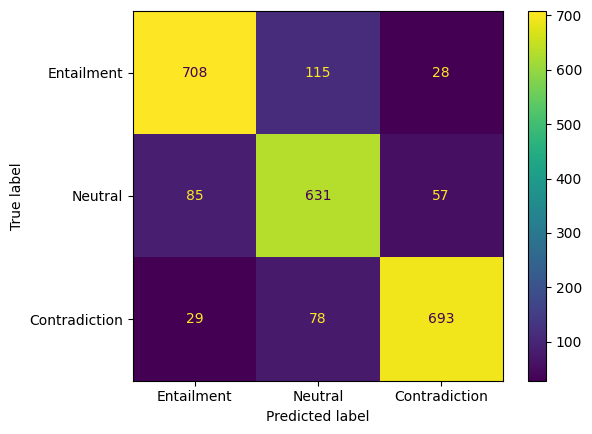

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
import matplotlib.pyplot as plt

cm = confusion_matrix(val_df['label'], mapped_arr_val)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Entailment', 'Neutral', 'Contradiction'])

disp.plot()
plt.show()

In [21]:
print(classification_report(val_df['label'], mapped_arr_val, target_names=['Entailment', 'Neutral', 'Contradiction']))

               precision    recall  f1-score   support

   Entailment       0.86      0.83      0.85       851
      Neutral       0.77      0.82      0.79       773
Contradiction       0.89      0.87      0.88       800

     accuracy                           0.84      2424
    macro avg       0.84      0.84      0.84      2424
 weighted avg       0.84      0.84      0.84      2424



In [24]:
import pandas as pd

test_data = pd.read_csv('content/test.csv')
test_data_df = test_data.iloc[:, 1:3]
test_data_df.head()

,premise,hypothesis
0,بکس، کیسی، راہیل، یسعیاہ، کیلی، کیلی، اور کولم...,"کیسی کے لئے کوئی یادگار نہیں ہوگا, کولمین ہائی..."
1,هذا هو ما تم نصحنا به.,عندما يتم إخبارهم بما يجب عليهم فعله ، فشلت ال...
2,et cela est en grande partie dû au fait que le...,Les mères se droguent.
3,与城市及其他公民及社区组织代表就IMA的艺术发展进行对话&amp,IMA与其他组织合作，因为它们都依靠共享资金。
4,Она все еще была там.,"Мы думали, что она ушла, однако, она осталась."


In [26]:
# tokenizer = AutoTokenizer.from_pretrained('xlm-roberta-large')
val_inputs = bert_encode(test_data_df, tokenizer)
val_inputs

<ipython-input-11-77c73ddca256>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['premise'] = df['premise'].astype(str)
<ipython-input-11-77c73ddca256>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hypothesis'] = df['hypothesis'].astype(str)


{'input_ids': <tf.Tensor: shape=(5195, 128), dtype=int32, numpy=
 array([[     0,    676,  20658, ...,      1,      1,      1],
        [     0,   2433,   1638, ...,      1,      1,      1],
        [     0,     82,  10804, ...,      1,      1,      1],
        ...,
        [     0, 115316,   4696, ...,      1,      1,      1],
        [     0,  56112,     25, ...,      1,      1,      1],
        [     0,    360,  34854, ...,      1,      1,      1]], dtype=int32)>,
 'attention_mask': <tf.Tensor: shape=(5195, 128), dtype=int32, numpy=
 array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}

In [27]:
predictions = loaded_model.predict(val_inputs)

163/163 [==============================] - 16s 100ms/step


In [28]:
predictions

array([[0.01819355, 0.05812234, 0.9236841 ],
       [0.02992359, 0.8923793 , 0.07769717],
       [0.93105465, 0.06010411, 0.00884124],
       ...,
       [0.4786981 , 0.45803657, 0.06326533],
       [0.9446058 , 0.05069287, 0.00470132],
       [0.00563374, 0.01593524, 0.97843105]], dtype=float32)

In [31]:
import numpy as np

indices = np.argmax(predictions, axis=1)

mapped_arr = np.where(indices == 0, 0, np.where(indices == 1, 1, 2))
prediction_df = pd.DataFrame(test_data['id']).assign(predictions=mapped_arr)
prediction_df

,id,B
0,c6d58c3f69,2
1,cefcc82292,1
2,e98005252c,0
3,58518c10ba,1
4,c32b0d16df,1
...,...,...
5190,5f90dd59b0,0
5191,f357a04e86,2
5192,1f0ea92118,0
5193,0407b48afb,0


In [32]:
prediction_df.to_csv('submission.csv', index=False)

In [21]:
!zip -r /content/model.zip /content/large_model.h5

  adding: content/large_model.h5 (deflated 35%)
